In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import osmnx as ox
import networkx as nx
import pandas as pd
from lmr_analyzer import Haversine
import json

# start timer for the loop
import time

In [3]:
# define the filename
filename = "route_id_2.csv"  # "docs/notebooks/osmnx/route_id_0_test.csv"

In [4]:
# import the csv file and store it in a pd.dataframe
df = pd.read_csv(filename)

# check the header
df.head()

,route_id,bbox_north,bbox_south,bbox_east,bbox_west
0,RouteID_054d3be0-af05-49f0-92a8-6ded9f491a6c,33.688122,33.442044,-117.590280,-117.847178
1,RouteID_05876081-1918-417c-8761-6819a18c3554,33.815057,33.688122,-117.847178,-117.989370
2,RouteID_05b28743-9d92-4c51-8803-e319ee2e3f94,33.688122,33.543766,-117.630010,-117.847178
3,RouteID_05eb1621-49f2-493d-8e29-6a7190eb64be,34.041775,33.937865,-117.128503,-117.297380
4,RouteID_065608cf-b6b6-4013-9658-0885b6b92593,34.160104,33.965477,-117.640245,-117.680503


In [5]:
area_dict = dict()

In [6]:
# iterate over the df and calculate the area of each bounding box
area_dict = dict()
for i in range(df.shape[0]):
    area = (
        Haversine(
            lat1=df["bbox_north"][i],
            lon1=df["bbox_west"][i],
            lat2=df["bbox_south"][i],
            lon2=df["bbox_west"][i],
        )
        * Haversine(
            lat1=df["bbox_north"][i],
            lon1=df["bbox_west"][i],
            lat2=df["bbox_north"][i],
            lon2=df["bbox_east"][i],
        )
    ) * (1000**2)
    area_dict[df["route_id"][i]] = area

In [7]:
graph_dict = dict()

In [8]:
# create graphs for each bounding box
count = 1
start = time.time()
end_it = time.time()

for key, value in df.iterrows():
    start_it = time.time()
    if count < 80:
        count += 1
        continue
    graph_dict[value["route_id"]] = ox.graph.graph_from_bbox(
        north=value["bbox_north"],
        south=value["bbox_south"],
        east=value["bbox_east"],
        west=value["bbox_west"],
        network_type="drive",
        simplify=True,
        retain_all=False,
        truncate_by_edge=False,
        clean_periphery=True,
        custom_filter=None,
    )
    print(
        f"\rDone {count:4} out of {len(df)}, {(100*count/len(df)):.2f} % - Estimated time remaining: {(end_it-start)*((len(df)-count)/(60*count)):.2f} min",
        end="",
        flush=True,
    )
    count += 1
    end_it = time.time()
    break

Done   80 out of 575, 13.91 % - Estimated time remaining: 0.00 min

In [ ]:
# help(ox.plot_graph)

In [9]:
# north - south distance # 20 is good
ns_dist = Haversine(
    lat1=df["bbox_north"][80],
    lon1=df["bbox_west"][80],
    lat2=df["bbox_south"][80],
    lon2=df["bbox_west"][80],
)

# east - west distance

ew_dist = Haversine(
    lat1=df["bbox_north"][80],
    lon1=df["bbox_west"][80],
    lat2=df["bbox_north"][80],
    lon2=df["bbox_east"][80],
)

(ew_dist, ns_dist)  # width, height

(9.184757571927536, 5.7130841360705595)

In [ ]:
ns_dist / ew_dist

In [ ]:
help(ox.save_graph_shapefile)

In [10]:
# create a shapefile with graph_dict[value["route_id"]] graph
ox.save_graph_shapefile(
    graph_dict[value["route_id"]],
    filepath=f"docs/notebooks/osmnx/graphs/{value['route_id']}.shp",
)

C:\Users\guiga\AppData\Local\Temp\ipykernel_4108\1660846126.py:2: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  ox.save_graph_shapefile(graph_dict[value["route_id"]], filepath =f"docs/notebooks/osmnx/graphs/{value['route_id']}.shp")
c:\Users\guiga\Documents\Github-vscode\Last-Mile-Routing-Analyzer\.venv\lib\site-packages\osmnx\io.py:116: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


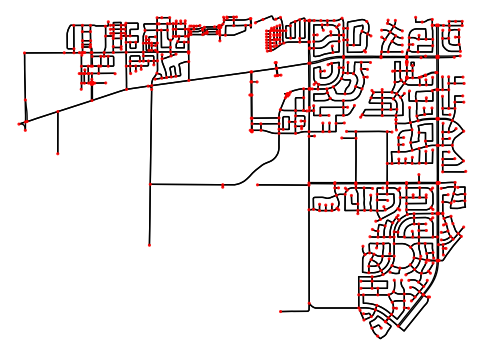

In [11]:
# plot the graph
fig = ox.plot_graph(
    G=graph_dict[value["route_id"]],
    ax=None,
    figsize=(7, 7 * (ns_dist / ew_dist)),  # (height, width)
    bgcolor="w",
    node_color="r",
    node_size=5,
    node_alpha=0.9,
    node_edgecolor="none",
    node_zorder=1,
    edge_color="black",
    edge_linewidth=1,
    edge_alpha=None,
    show=True,
    close=False,
    save=False,
    filepath=None,
    dpi=400,
    bbox=None,
)

In [12]:
# get the route id

route_id_ex = df["route_id"][80]
route_id_ex

route_ex_seq = {
    "actual": {
        "AA": 141,
        "AD": 125,
        "AJ": 25,
        "AL": 38,
        "AW": 142,
        "BB": 69,
        "BE": 75,
        "BJ": 11,
        "BK": 82,
        "BP": 126,
        "BQ": 50,
        "BU": 0,
        "BV": 116,
        "CC": 92,
        "CD": 131,
        "CI": 8,
        "CL": 76,
        "CP": 106,
        "CT": 70,
        "DG": 132,
        "DJ": 23,
        "DO": 32,
        "DQ": 89,
        "DT": 133,
        "EE": 29,
        "EJ": 150,
        "EM": 94,
        "EN": 148,
        "EP": 24,
        "EW": 105,
        "EY": 80,
        "FA": 86,
        "FB": 77,
        "FD": 43,
        "FH": 114,
        "FL": 36,
        "FM": 19,
        "FO": 26,
        "FP": 136,
        "FS": 84,
        "FY": 146,
        "GK": 40,
        "GM": 118,
        "GN": 49,
        "GO": 120,
        "GR": 88,
        "GV": 33,
        "GW": 41,
        "HB": 58,
        "HE": 27,
        "HH": 14,
        "HO": 13,
        "HP": 83,
        "HT": 81,
        "HU": 45,
        "HX": 7,
        "IG": 42,
        "II": 112,
        "IJ": 62,
        "IK": 44,
        "IM": 149,
        "IO": 111,
        "IQ": 151,
        "JA": 61,
        "JQ": 55,
        "JT": 124,
        "KD": 12,
        "KI": 53,
        "KJ": 145,
        "KL": 96,
        "KO": 56,
        "KQ": 79,
        "KR": 110,
        "KT": 67,
        "KW": 144,
        "LE": 108,
        "LF": 113,
        "LO": 100,
        "LW": 97,
        "MF": 6,
        "MG": 129,
        "MI": 130,
        "MN": 57,
        "ND": 64,
        "NE": 154,
        "NG": 54,
        "NJ": 103,
        "NK": 135,
        "NO": 18,
        "OC": 72,
        "OD": 122,
        "OL": 31,
        "OM": 138,
        "ON": 98,
        "OP": 39,
        "OQ": 2,
        "OT": 20,
        "OZ": 28,
        "PG": 17,
        "PH": 16,
        "PI": 35,
        "PJ": 60,
        "PQ": 63,
        "QC": 5,
        "QD": 140,
        "QE": 68,
        "QF": 147,
        "QH": 153,
        "QM": 21,
        "QP": 139,
        "QQ": 4,
        "QT": 134,
        "QX": 78,
        "QZ": 34,
        "RL": 37,
        "RR": 30,
        "RW": 47,
        "RZ": 66,
        "SO": 59,
        "SZ": 73,
        "TC": 48,
        "TH": 128,
        "TL": 90,
        "TV": 1,
        "TW": 101,
        "UA": 3,
        "UB": 152,
        "UK": 104,
        "UO": 51,
        "VB": 123,
        "VG": 52,
        "VP": 22,
        "VQ": 95,
        "VT": 115,
        "VZ": 93,
        "WE": 102,
        "WQ": 9,
        "XI": 109,
        "XK": 107,
        "XM": 74,
        "XT": 15,
        "XX": 91,
        "YG": 71,
        "YH": 99,
        "YJ": 85,
        "YM": 87,
        "YQ": 121,
        "YX": 137,
        "YZ": 143,
        "ZA": 46,
        "ZJ": 119,
        "ZO": 65,
        "ZR": 10,
        "ZV": 117,
        "ZX": 127,
    }
}

route_ex_coords = {
    "RouteID_1d916cbe-36b2-49af-8025-e086007be433": {
        "station_code": "DLA7",
        "date_YYYY_MM_DD": "2018-08-17",
        "departure_time_utc": "16:31:15",
        "executor_capacity_cm3": 3313071.0,
        "route_score": "Medium",
        "stops": {
            "AA": {
                "lat": 34.014293,
                "lng": -117.74679,
                "type": "Dropoff",
                "zone_id": "A-23.3A",
            },
            "AD": {
                "lat": 34.008684,
                "lng": -117.744874,
                "type": "Dropoff",
                "zone_id": "A-22.2A",
            },
            "AJ": {
                "lat": 33.988439,
                "lng": -117.72967,
                "type": "Dropoff",
                "zone_id": "A-22.2G",
            },
            "AL": {
                "lat": 33.997957,
                "lng": -117.738188,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "AW": {
                "lat": 34.014562,
                "lng": -117.746491,
                "type": "Dropoff",
                "zone_id": "A-23.3A",
            },
            "BB": {
                "lat": 34.009999,
                "lng": -117.736465,
                "type": "Dropoff",
                "zone_id": "A-22.3D",
            },
            "BE": {
                "lat": 34.007981,
                "lng": -117.738659,
                "type": "Dropoff",
                "zone_id": "A-22.3D",
            },
            "BJ": {
                "lat": 33.986988,
                "lng": -117.720135,
                "type": "Dropoff",
                "zone_id": "A-22.1H",
            },
            "BK": {
                "lat": 34.003569,
                "lng": -117.73812,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "BP": {
                "lat": 34.009041,
                "lng": -117.744231,
                "type": "Dropoff",
                "zone_id": "A-22.2A",
            },
            "BQ": {
                "lat": 34.003806,
                "lng": -117.730696,
                "type": "Dropoff",
                "zone_id": "A-22.1E",
            },
            "BU": {
                "lat": 33.965477,
                "lng": -117.653303,
                "type": "Station",
                # "zone_id": NaN,
            },
            "BV": {
                "lat": 34.011189,
                "lng": -117.750371,
                "type": "Dropoff",
                "zone_id": "A-22.3B",
            },
            "CC": {
                "lat": 34.005492,
                "lng": -117.743364,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "CD": {
                "lat": 34.008245,
                "lng": -117.740479,
                "type": "Dropoff",
                "zone_id": "A-23.1A",
            },
            "CI": {
                "lat": 33.988195,
                "lng": -117.717816,
                "type": "Dropoff",
                "zone_id": "A-22.1H",
            },
            "CL": {
                "lat": 34.00832,
                "lng": -117.739282,
                "type": "Dropoff",
                "zone_id": "A-22.3D",
            },
            "CP": {
                "lat": 34.009934,
                "lng": -117.752612,
                "type": "Dropoff",
                "zone_id": "A-22.1B",
            },
            "CT": {
                "lat": 34.009574,
                "lng": -117.737725,
                "type": "Dropoff",
                "zone_id": "A-22.3D",
            },
            "DG": {
                "lat": 34.008257,
                "lng": -117.740586,
                "type": "Dropoff",
                "zone_id": "A-23.1A",
            },
            "DJ": {
                "lat": 33.988635,
                "lng": -117.724495,
                "type": "Dropoff",
                "zone_id": "A-22.2G",
            },
            "DO": {
                "lat": 33.99981,
                "lng": -117.734476,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "DQ": {
                "lat": 34.005474,
                "lng": -117.741598,
                "type": "Dropoff",
                "zone_id": "A-22.2C",
            },
            "DT": {
                "lat": 34.00927,
                "lng": -117.741442,
                "type": "Dropoff",
                "zone_id": "A-23.1A",
            },
            "EE": {
                "lat": 33.992347,
                "lng": -117.739459,
                "type": "Dropoff",
                "zone_id": "A-22.3G",
            },
            "EJ": {
                "lat": 34.01595,
                "lng": -117.747517,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "EM": {
                "lat": 34.007466,
                "lng": -117.745931,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "EN": {
                "lat": 34.015004,
                "lng": -117.748379,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "EP": {
                "lat": 33.988446,
                "lng": -117.726901,
                "type": "Dropoff",
                "zone_id": "A-22.2G",
            },
            "EW": {
                "lat": 34.009982,
                "lng": -117.752957,
                "type": "Dropoff",
                "zone_id": "A-22.1B",
            },
            "EY": {
                "lat": 34.003574,
                "lng": -117.738001,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "FA": {
                "lat": 34.005911,
                "lng": -117.740675,
                "type": "Dropoff",
                "zone_id": "A-22.2C",
            },
            "FB": {
                "lat": 34.0038,
                "lng": -117.734921,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "FD": {
                "lat": 34.000355,
                "lng": -117.739696,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "FH": {
                "lat": 34.011866,
                "lng": -117.749357,
                "type": "Dropoff",
                "zone_id": "A-22.2B",
            },
            "FL": {
                "lat": 33.997985,
                "lng": -117.737461,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "FM": {
                "lat": 33.989347,
                "lng": -117.721665,
                "type": "Dropoff",
                "zone_id": "A-22.2G",
            },
            "FO": {
                "lat": 33.9895,
                "lng": -117.729687,
                "type": "Dropoff",
                "zone_id": "A-22.2G",
            },
            "FP": {
                "lat": 34.01202,
                "lng": -117.742414,
                "type": "Dropoff",
                "zone_id": "A-23.1A",
            },
            "FS": {
                "lat": 34.004605,
                "lng": -117.740055,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "FY": {
                "lat": 34.01425,
                "lng": -117.749827,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "GK": {
                "lat": 33.998525,
                "lng": -117.740029,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "GM": {
                "lat": 34.009729,
                "lng": -117.746169,
                "type": "Dropoff",
                "zone_id": "A-22.3A",
            },
            "GN": {
                "lat": 34.004686,
                "lng": -117.73155,
                "type": "Dropoff",
                "zone_id": "A-22.1E",
            },
            "GO": {
                "lat": 34.011124,
                "lng": -117.744223,
                "type": "Dropoff",
                "zone_id": "A-22.3A",
            },
            "GR": {
                "lat": 34.006221,
                "lng": -117.74114,
                "type": "Dropoff",
                "zone_id": "A-22.2C",
            },
            "GV": {
                "lat": 33.997811,
                "lng": -117.73382,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "GW": {
                "lat": 33.99911,
                "lng": -117.739739,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "HB": {
                "lat": 34.005548,
                "lng": -117.735387,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "HE": {
                "lat": 33.994843,
                "lng": -117.741713,
                "type": "Dropoff",
                "zone_id": "A-22.3G",
            },
            "HH": {
                "lat": 33.988017,
                "lng": -117.720549,
                "type": "Dropoff",
                "zone_id": "A-22.1H",
            },
            "HO": {
                "lat": 33.987564,
                "lng": -117.72037,
                "type": "Dropoff",
                "zone_id": "A-22.1H",
            },
            "HP": {
                "lat": 34.004304,
                "lng": -117.73838,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "HT": {
                "lat": 34.003637,
                "lng": -117.737626,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "HU": {
                "lat": 34.00098,
                "lng": -117.738121,
                "type": "Dropoff",
                "zone_id": "A-22.2E",
            },
            "HX": {
                "lat": 33.988078,
                "lng": -117.717421,
                "type": "Dropoff",
                "zone_id": "A-22.1H",
            },
            "IG": {
                "lat": 33.999062,
                "lng": -117.737415,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "II": {
                "lat": 34.012516,
                "lng": -117.747952,
                "type": "Dropoff",
                "zone_id": "A-22.2B",
            },
            "IJ": {
                "lat": 34.006157,
                "lng": -117.734413,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "IK": {
                "lat": 34.001555,
                "lng": -117.737995,
                "type": "Dropoff",
                "zone_id": "A-22.2E",
            },
            "IM": {
                "lat": 34.015777,
                "lng": -117.747611,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "IO": {
                "lat": 34.010101,
                "lng": -117.748893,
                "type": "Dropoff",
                "zone_id": "A-22.2B",
            },
            "IQ": {
                "lat": 34.016199,
                "lng": -117.74785,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "JA": {
                "lat": 34.007263,
                "lng": -117.73624,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "JQ": {
                "lat": 34.006946,
                "lng": -117.731334,
                "type": "Dropoff",
                "zone_id": "A-22.1E",
            },
            "JT": {
                "lat": 34.008344,
                "lng": -117.745485,
                "type": "Dropoff",
                "zone_id": "A-22.2A",
            },
            "KD": {
                "lat": 33.987319,
                "lng": -117.720503,
                "type": "Dropoff",
                "zone_id": "A-22.1H",
            },
            "KI": {
                "lat": 34.005841,
                "lng": -117.730372,
                "type": "Dropoff",
                "zone_id": "A-22.1E",
            },
            "KJ": {
                "lat": 34.014246,
                "lng": -117.748927,
                "type": "Dropoff",
                "zone_id": "A-23.2A",
            },
            "KL": {
                "lat": 34.007768,
                "lng": -117.748686,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "KO": {
                "lat": 34.005288,
                "lng": -117.732839,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "KQ": {
                "lat": 34.004119,
                "lng": -117.736473,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "KR": {
                "lat": 34.010408,
                "lng": -117.748779,
                "type": "Dropoff",
                "zone_id": "A-22.2B",
            },
            "KT": {
                "lat": 34.007805,
                "lng": -117.734149,
                "type": "Dropoff",
                "zone_id": "A-22.2D",
            },
            "KW": {
                "lat": 34.014525,
                "lng": -117.748416,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "LE": {
                "lat": 34.009685,
                "lng": -117.749906,
                "type": "Dropoff",
                "zone_id": "A-22.2B",
            },
            "LF": {
                "lat": 34.012514,
                "lng": -117.748548,
                "type": "Dropoff",
                "zone_id": "A-22.2B",
            },
            "LO": {
                "lat": 34.006465,
                "lng": -117.750887,
                "type": "Dropoff",
                "zone_id": "A-22.1B",
            },
            "LW": {
                "lat": 34.007744,
                "lng": -117.748045,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "MF": {
                "lat": 33.991139,
                "lng": -117.71513,
                "type": "Dropoff",
                "zone_id": "A-22.2H",
            },
            "MG": {
                "lat": 34.008321,
                "lng": -117.74227,
                "type": "Dropoff",
                "zone_id": "A-22.2A",
            },
            "MI": {
                "lat": 34.008227,
                "lng": -117.740605,
                "type": "Dropoff",
                "zone_id": "A-22.1A",
            },
            "MN": {
                "lat": 34.005421,
                "lng": -117.73337,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "ND": {
                "lat": 34.006792,
                "lng": -117.734419,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "NE": {
                "lat": 34.016673,
                "lng": -117.748245,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "NG": {
                "lat": 34.006195,
                "lng": -117.730598,
                "type": "Dropoff",
                "zone_id": "A-22.1E",
            },
            "NJ": {
                "lat": 34.007218,
                "lng": -117.750728,
                "type": "Dropoff",
                "zone_id": "A-22.1B",
            },
            "NK": {
                "lat": 34.012121,
                "lng": -117.740829,
                "type": "Dropoff",
                "zone_id": "A-23.1A",
            },
            "NO": {
                "lat": 33.989426,
                "lng": -117.717284,
                "type": "Dropoff",
                "zone_id": "A-22.1G",
            },
            "OC": {
                "lat": 34.010292,
                "lng": -117.739401,
                "type": "Dropoff",
                "zone_id": "A-22.3D",
            },
            "OD": {
                "lat": 34.010426,
                "lng": -117.74539,
                "type": "Dropoff",
                "zone_id": "A-22.3A",
            },
            "OL": {
                "lat": 33.998782,
                "lng": -117.732619,
                "type": "Dropoff",
                "zone_id": "A-22.3G",
            },
            "OM": {
                "lat": 34.01209,
                "lng": -117.746029,
                "type": "Dropoff",
                "zone_id": "A-23.2A",
            },
            "ON": {
                "lat": 34.0078,
                "lng": -117.746899,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "OP": {
                "lat": 33.997687,
                "lng": -117.73978,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "OQ": {
                "lat": 33.997216,
                "lng": -117.716104,
                "type": "Dropoff",
                "zone_id": "A-22.2H",
            },
            "OT": {
                "lat": 33.989328,
                "lng": -117.722133,
                "type": "Dropoff",
                "zone_id": "A-22.2G",
            },
            "OZ": {
                "lat": 33.993736,
                "lng": -117.739456,
                "type": "Dropoff",
                "zone_id": "A-22.3G",
            },
            "PG": {
                "lat": 33.989327,
                "lng": -117.716914,
                "type": "Dropoff",
                "zone_id": "A-22.1G",
            },
            "PH": {
                "lat": 33.989407,
                "lng": -117.718826,
                "type": "Dropoff",
                "zone_id": "A-22.1G",
            },
            "PI": {
                "lat": 33.998385,
                "lng": -117.736348,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "PJ": {
                "lat": 34.006962,
                "lng": -117.736971,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "PQ": {
                "lat": 34.006296,
                "lng": -117.734553,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "QC": {
                "lat": 33.98971,
                "lng": -117.712423,
                "type": "Dropoff",
                "zone_id": "A-22.2H",
            },
            "QD": {
                "lat": 34.015011,
                "lng": -117.743797,
                "type": "Dropoff",
                "zone_id": "A-23.3A",
            },
            "QE": {
                "lat": 34.008814,
                "lng": -117.735199,
                "type": "Dropoff",
                "zone_id": "A-22.2D",
            },
            "QF": {
                "lat": 34.015343,
                "lng": -117.74976,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "QH": {
                "lat": 34.016856,
                "lng": -117.749594,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "QM": {
                "lat": 33.989299,
                "lng": -117.723047,
                "type": "Dropoff",
                "zone_id": "A-22.2G",
            },
            "QP": {
                "lat": 34.013995,
                "lng": -117.747276,
                "type": "Dropoff",
                "zone_id": "A-23.2A",
            },
            "QQ": {
                "lat": 33.99269,
                "lng": -117.715143,
                "type": "Dropoff",
                "zone_id": "A-22.2H",
            },
            "QT": {
                "lat": 34.011035,
                "lng": -117.742218,
                "type": "Dropoff",
                "zone_id": "A-23.1A",
            },
            "QX": {
                "lat": 34.004022,
                "lng": -117.735827,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "QZ": {
                "lat": 33.998294,
                "lng": -117.735379,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "RL": {
                "lat": 33.998028,
                "lng": -117.737539,
                "type": "Dropoff",
                "zone_id": "A-22.3E",
            },
            "RR": {
                "lat": 33.990399,
                "lng": -117.743281,
                "type": "Dropoff",
                "zone_id": "A-22.3G",
            },
            "RW": {
                "lat": 34.000988,
                "lng": -117.736224,
                "type": "Dropoff",
                "zone_id": "A-22.2E",
            },
            "RZ": {
                "lat": 34.008224,
                "lng": -117.733071,
                "type": "Dropoff",
                "zone_id": "A-22.2D",
            },
            "SO": {
                "lat": 34.006373,
                "lng": -117.735491,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "SZ": {
                "lat": 34.008516,
                "lng": -117.738082,
                "type": "Dropoff",
                "zone_id": "A-22.3D",
            },
            "TC": {
                "lat": 33.998336,
                "lng": -117.723825,
                "type": "Dropoff",
                "zone_id": "A-22.2E",
            },
            "TH": {
                "lat": 34.009529,
                "lng": -117.743335,
                "type": "Dropoff",
                "zone_id": "A-22.2A",
            },
            "TL": {
                "lat": 34.004407,
                "lng": -117.741673,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "TV": {
                "lat": 33.997213,
                "lng": -117.713182,
                "type": "Dropoff",
                "zone_id": "A-22.2H",
            },
            "TW": {
                "lat": 34.006421,
                "lng": -117.750574,
                "type": "Dropoff",
                "zone_id": "A-22.1B",
            },
            "UA": {
                "lat": 33.994564,
                "lng": -117.715159,
                "type": "Dropoff",
                "zone_id": "A-22.2H",
            },
            "UB": {
                "lat": 34.016186,
                "lng": -117.747831,
                "type": "Dropoff",
                "zone_id": "A-23.3B",
            },
            "UK": {
                "lat": 34.008328,
                "lng": -117.752238,
                "type": "Dropoff",
                "zone_id": "A-22.1B",
            },
            "UO": {
                "lat": 34.003847,
                "lng": -117.729857,
                "type": "Dropoff",
                "zone_id": "A-22.1E",
            },
            "VB": {
                "lat": 34.008368,
                "lng": -117.74385,
                "type": "Dropoff",
                "zone_id": "A-22.2A",
            },
            "VG": {
                "lat": 34.005011,
                "lng": -117.730029,
                "type": "Dropoff",
                "zone_id": "A-22.1E",
            },
            "VP": {
                "lat": 33.988511,
                "lng": -117.72541,
                "type": "Dropoff",
                "zone_id": "A-22.2G",
            },
            "VQ": {
                "lat": 34.006972,
                "lng": -117.745978,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "VT": {
                "lat": 34.010933,
                "lng": -117.750833,
                "type": "Dropoff",
                "zone_id": "A-22.3B",
            },
            "VZ": {
                "lat": 34.00709,
                "lng": -117.744732,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "WE": {
                "lat": 34.006375,
                "lng": -117.750214,
                "type": "Dropoff",
                "zone_id": "A-22.1B",
            },
            "WQ": {
                "lat": 33.987164,
                "lng": -117.71793,
                "type": "Dropoff",
                "zone_id": "A-22.1H",
            },
            "XI": {
                "lat": 34.009842,
                "lng": -117.749882,
                "type": "Dropoff",
                "zone_id": "A-22.2B",
            },
            "XK": {
                "lat": 34.009336,
                "lng": -117.751204,
                "type": "Dropoff",
                "zone_id": "A-22.1B",
            },
            "XM": {
                "lat": 34.008902,
                "lng": -117.73865,
                "type": "Dropoff",
                "zone_id": "A-22.3D",
            },
            "XT": {
                "lat": 33.988572,
                "lng": -117.720549,
                "type": "Dropoff",
                "zone_id": "A-22.1G",
            },
            "XX": {
                "lat": 34.004763,
                "lng": -117.742168,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "YG": {
                "lat": 34.012276,
                "lng": -117.738694,
                "type": "Dropoff",
                "zone_id": "A-22.3D",
            },
            "YH": {
                "lat": 34.00692,
                "lng": -117.748677,
                "type": "Dropoff",
                "zone_id": "A-22.1C",
            },
            "YJ": {
                "lat": 34.005191,
                "lng": -117.739035,
                "type": "Dropoff",
                "zone_id": "A-22.3C",
            },
            "YM": {
                "lat": 34.006376,
                "lng": -117.740681,
                "type": "Dropoff",
                "zone_id": "A-22.2C",
            },
            "YQ": {
                "lat": 34.009966,
                "lng": -117.744814,
                "type": "Dropoff",
                "zone_id": "A-22.3A",
            },
            "YX": {
                "lat": 34.013203,
                "lng": -117.745031,
                "type": "Dropoff",
                "zone_id": "A-23.2A",
            },
            "YZ": {
                "lat": 34.014954,
                "lng": -117.747471,
                "type": "Dropoff",
                "zone_id": "A-23.3A",
            },
            "ZA": {
                "lat": 34.000987,
                "lng": -117.737136,
                "type": "Dropoff",
                "zone_id": "A-22.2E",
            },
            "ZJ": {
                "lat": 34.011025,
                "lng": -117.744938,
                "type": "Dropoff",
                "zone_id": "A-22.3A",
            },
            "ZO": {
                "lat": 34.006568,
                "lng": -117.733662,
                "type": "Dropoff",
                "zone_id": "A-22.1D",
            },
            "ZR": {
                "lat": 33.987231,
                "lng": -117.718819,
                "type": "Dropoff",
                "zone_id": "A-22.1H",
            },
            "ZV": {
                "lat": 34.008971,
                "lng": -117.748164,
                "type": "Dropoff",
                "zone_id": "A-22.3A",
            },
            "ZX": {
                "lat": 34.00906,
                "lng": -117.743705,
                "type": "Dropoff",
                "zone_id": "A-22.2A",
            },
        },
    }
}

In [13]:
# get the coordinates sequence of the route.
# coords = [(lat1, lng1), (lat2, lng2), (lat3, lng3), ..., (latn, lngn)]
coords = []
for i in range(len(route_ex_seq["actual"])):
    flipped = {v: k for k, v in route_ex_seq["actual"].items()}
    stop = flipped[i]
    lat = route_ex_coords["RouteID_1d916cbe-36b2-49af-8025-e086007be433"]["stops"][
        stop
    ]["lat"]
    lng = route_ex_coords["RouteID_1d916cbe-36b2-49af-8025-e086007be433"]["stops"][
        stop
    ]["lng"]
    coords.append((lat, lng))

In [18]:
coords[0][1]

-117.653303

In [29]:
# Get the graph of the route
graph = graph_dict[value["route_id"]]

# the the nearest node of each point present in the coords list
# and store the node in the nearest_node list
nearest_node = []
for i in range(len(coords)):
    node_id = ox.distance.nearest_nodes(graph, coords[i][0], coords[i][1])
    nearest_node.append(node_id)

In [30]:
nearest_node

[4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,
 4752165871,

In [ ]:
# iterate through the graph_dict and convert the graphs to undirected graphs
for key, value in graph_dict.items():
    graph_dict[key] = nx.to_undirected(value)

In [ ]:
# calculate basic stats for each graph
stats_dict = dict()
count = 1
for key, value in graph_dict.items():
    stats_dict[key] = ox.basic_stats(value, area=area_dict[key])
    print(
        f"\rDone {count:4} out of {len(df)}, {(100*count/len(df)):.2f} %",
        end="",
        flush=True,
    )
    count += 1

In [ ]:
# calculate orientation and entropy for each graph
entropy_dict = dict()

In [ ]:
count = 1

start = time.time()
start_it = start

for key, value in graph_dict.items():
    graph_dict[key] = ox.bearing.add_edge_bearings(value)
    entropy_dict[key] = ox.bearing.orientation_entropy(value)
    end_it = time.time()
    print(
        f"\rDone {count:4} out of {len(df)}, {(100*count/len(df)):.2f} % - Estimated time remaining: {(end_it-start)*((len(df)-count)/(60*count)):.2f} min",
        end="",
        flush=True,
    )
    count += 1
    start_it = time.time()

In [ ]:
# combine stats and entropy into one dict
stats_entropy_dict = dict()

In [ ]:
count = 1
for key, value in stats_dict.items():
    stats_entropy_dict[key] = {
        "street_length_total": value["street_length_total"],
        "street_density_km": value["street_density_km"],
        "intersection_count": value["intersection_count"],
        "intersection_density_km": value["intersection_density_km"],
        "k_avg": value["k_avg"],
        "street_density_km": value["street_density_km"],
        "entropy": entropy_dict[key],
    }
    print(
        f"\rDone {count:4} out of {len(df)}, {(100*count/len(df)):.2f} %",
        end="",
        flush=True,
    )
    count += 1

In [ ]:
# save the final dictionary as a json file
with open(f"stats_entropy_dict{filename[-5]}.json", "w") as fp:
    json.dump(stats_entropy_dict, fp)